# Loading libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import re
warnings.filterwarnings('ignore')

# Loading data

In [42]:
# === Load preselected SNP data === #
data = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/CAR/SNP_coding_chr1_chr22_additive_WithPheno.csv")  # Replace with your full merged dataset if needed

# === Define features and target === #
X = data.drop(columns=["FID","IID","AGE","SEX","APOE4","ADRD","PC1","PC2","PC3","PC4"])  # Replace 'ADRD_FINAL' with your phenotype column
y = data["ADRD"]


In [43]:
X.head()

,chr1:2284767:G:A_A,chr1:3388452:C:T_T,chr1:3388902:C:A_A,chr1:29784378:T:C_C,chr1:29788473:C:T_T,chr1:47474978:C:A_A,chr1:59311433:T:C_C,chr1:59325722:A:C_C,chr1:59330518:G:A_A,chr1:59332178:T:TC_TC,...,chr22:37657902:C:T_T,chr22:37670549:A:C_C,chr22:39530957:G:A_A,chr22:48421648:C:T_C,chr22:48531736:T:C_T,chr22:48839585:GGCCACCAAGCTCA:G_G,chr22:50499364:G:A_A,chr22:50501479:TA:T_TA,chr22:50501578:A:G_A,chr22:50629837:G:A_A
0,0,0,0,1,1,0,0,0,0,0,...,1,1,1,0,0,0,2,2,2,0
1,0,1,1,1,1,0,0,0,0,0,...,1,2,0,0,0,0,1,1,1,0
2,0,1,1,2,2,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: ADRD, dtype: int64

# Split data

In [45]:
# Check for NaNs or infinite values
print("NaNs in X:", X.isnull().sum().sum())
print("NaNs in y:", y.isnull().sum())
print("Infinite values in X:", np.isinf(X).sum().sum())

# Option 1: Drop rows with any NaNs in X or y
#data_clean = data.dropna()
#X = data_clean.drop(columns=["IID", "ADRD"])
#y = data_clean["ADRD"]
#data = data_clean.copy()


# Option 2 (alternative): Fill NaNs (optional)
# X = X.fillna(0)

# Check again
print("After cleaning - NaNs in X:", X.isnull().sum().sum())
print("After cleaning - NaNs in y:", y.isnull().sum())


NaNs in X: 0
NaNs in y: 0
Infinite values in X: 0
After cleaning - NaNs in X: 0
After cleaning - NaNs in y: 0


In [46]:
#data_clean = data.dropna()
#data = data_clean.copy()
# Sanitize column names
X.columns = [re.sub(r'[^\w]', '_', col) for col in X.columns]

In [47]:
# === Split data === #
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)


In [48]:
X_train

,chr1_2284767_G_A_A,chr1_3388452_C_T_T,chr1_3388902_C_A_A,chr1_29784378_T_C_C,chr1_29788473_C_T_T,chr1_47474978_C_A_A,chr1_59311433_T_C_C,chr1_59325722_A_C_C,chr1_59330518_G_A_A,chr1_59332178_T_TC_TC,...,chr22_37657902_C_T_T,chr22_37670549_A_C_C,chr22_39530957_G_A_A,chr22_48421648_C_T_C,chr22_48531736_T_C_T,chr22_48839585_GGCCACCAAGCTCA_G_G,chr22_50499364_G_A_A,chr22_50501479_TA_T_TA,chr22_50501578_A_G_A,chr22_50629837_G_A_A
1100,0,0,0,0,0,0,0,0,0,0,...,1,2,1,0,0,0,0,0,0,0
1200,0,1,1,0,0,0,0,0,0,0,...,2,2,1,2,1,0,1,1,1,0
2564,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
2134,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
269,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0,0,0,1,1,0,0,0,0,0,...,1,1,0,0,1,0,1,1,1,0
2035,0,0,0,1,1,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,0
2225,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,0
2239,0,0,0,1,1,0,0,0,0,0,...,2,2,0,0,0,0,1,1,1,0


# Logistic Regression Models

In [49]:
# === Logistic Regression Models === #
models = {
    "Logistic_Lasso": LogisticRegression(penalty='l1', solver='saga', max_iter=1000),
    "Logistic_Ridge": LogisticRegression(penalty='l2', solver='saga', max_iter=1000),
    "Logistic_ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)
}

# Fitting

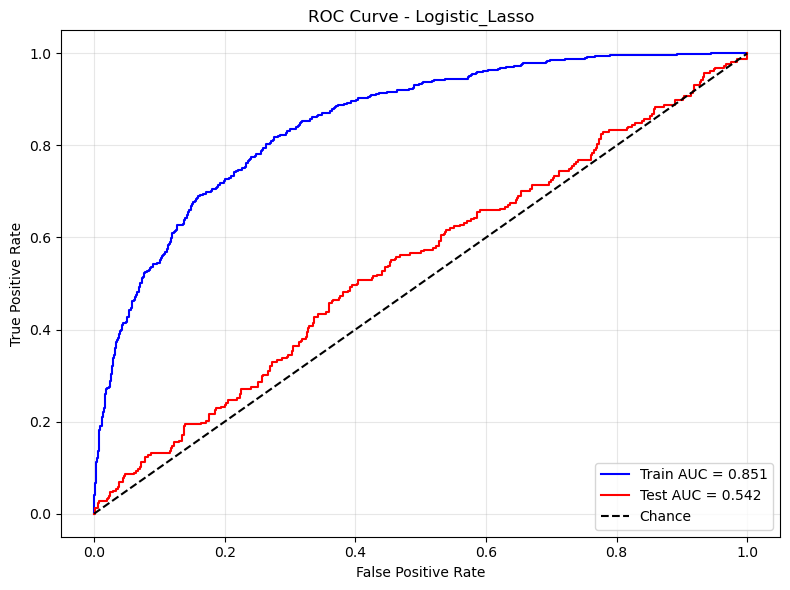

Logistic_Lasso - Train AUC: 0.8515 | Test AUC: 0.5417


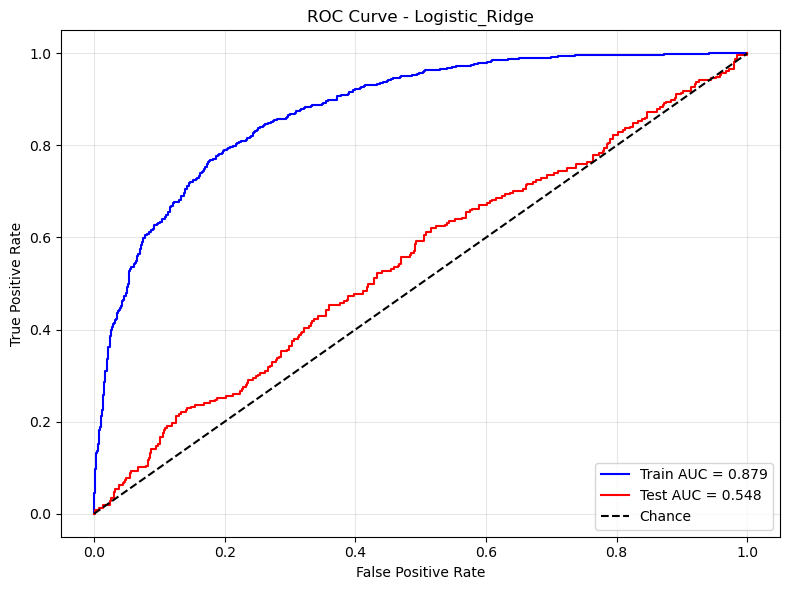

Logistic_Ridge - Train AUC: 0.8786 | Test AUC: 0.5482


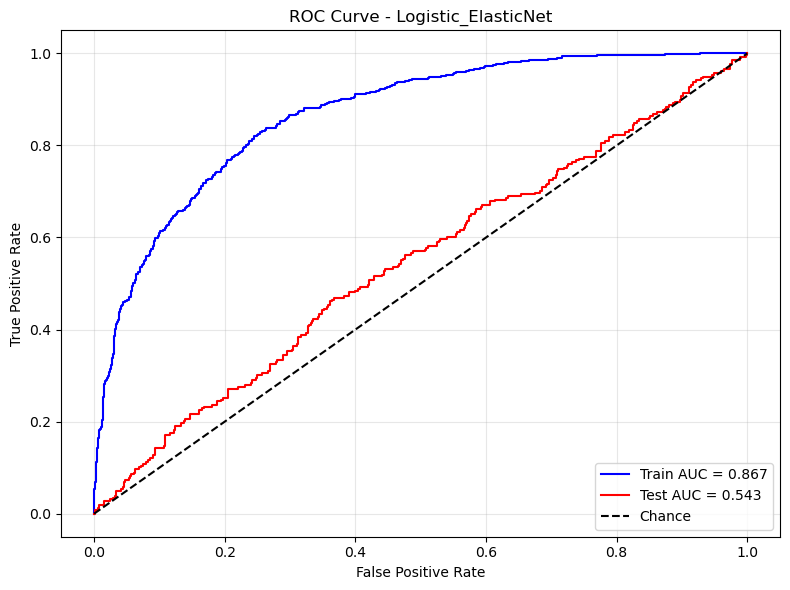

Logistic_ElasticNet - Train AUC: 0.8669 | Test AUC: 0.5435


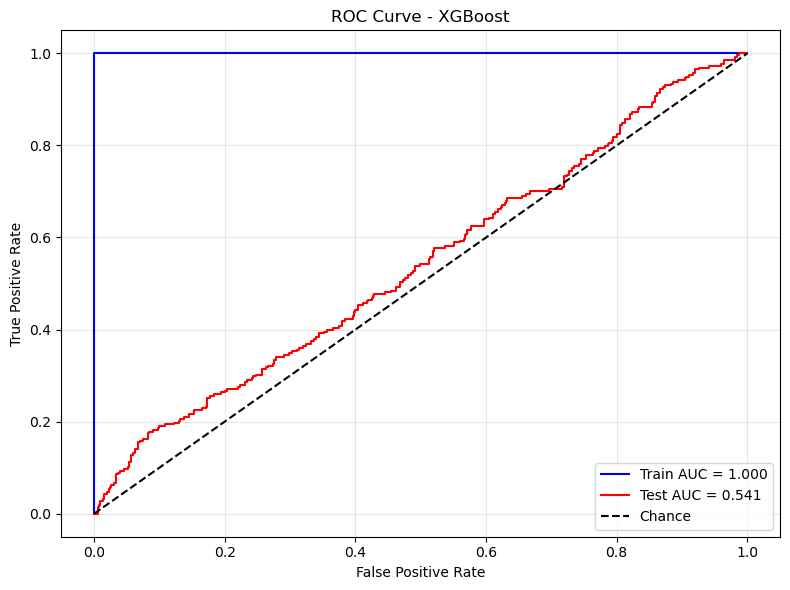

XGBoost - Train AUC: 1.0000 | Test AUC: 0.5410
[LightGBM] [Info] Number of positive: 602, number of negative: 1224
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2739
[LightGBM] [Info] Number of data points in the train set: 1826, number of used features: 967
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329682 -> initscore=-0.709622
[LightGBM] [Info] Start training from score -0.709622


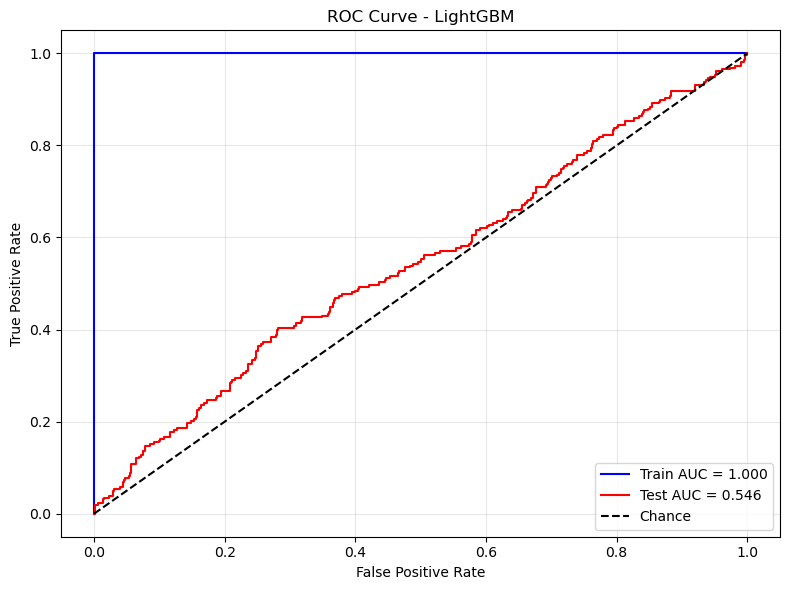

LightGBM - Train AUC: 1.0000 | Test AUC: 0.5456


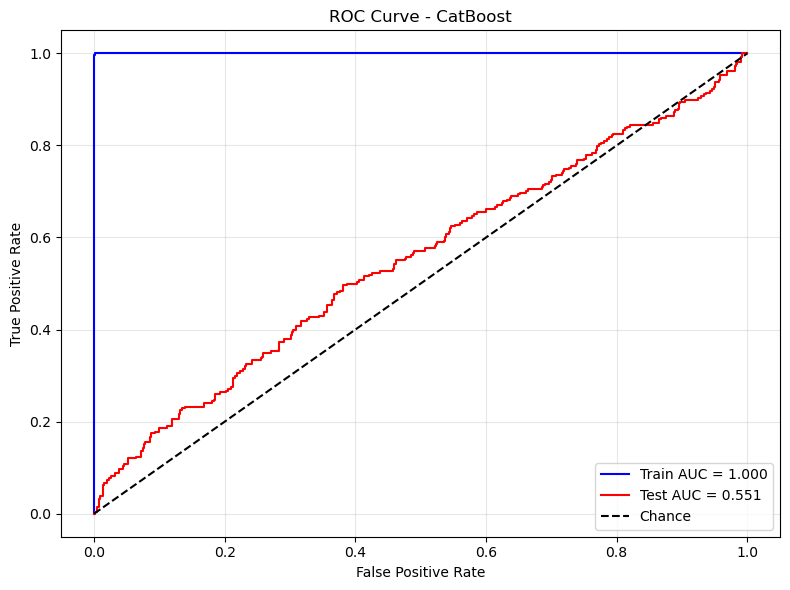

CatBoost - Train AUC: 1.0000 | Test AUC: 0.5513


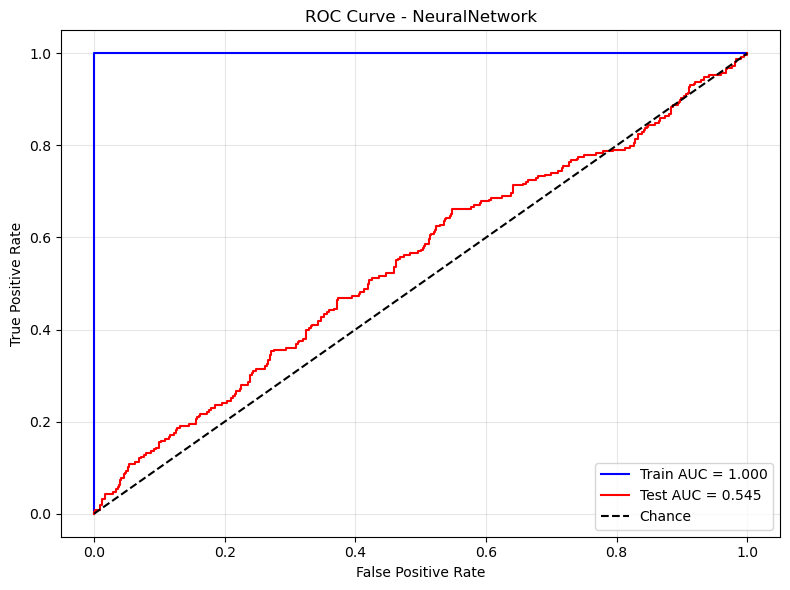

NeuralNetwork - Train AUC: 1.0000 | Test AUC: 0.5454


In [50]:
import matplotlib.pyplot as plt

# === Train, evaluate, and plot ROC curves === #
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predict probabilities
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    # AUC scores
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    # ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}", color='blue')
    plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}", color='red')
    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"ROC_{name}.png")
    plt.show()

    print(f"{name} - Train AUC: {auc_train:.4f} | Test AUC: {auc_test:.4f}")

# Evaluation of feature importance

In [51]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


Evaluating Logistic_Lasso...
Mean ROC-AUC: 0.5393 ± 0.0163


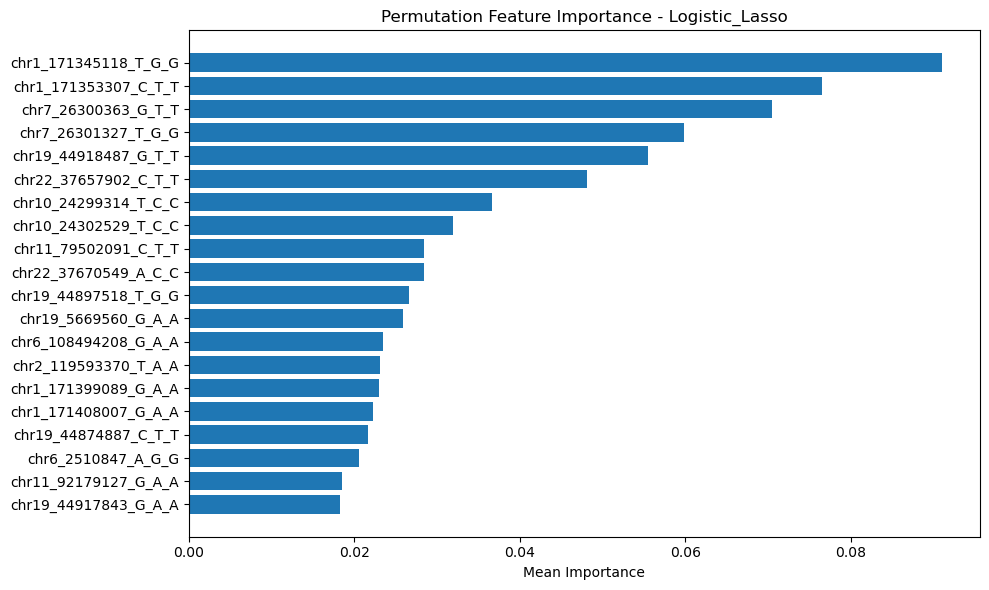


Evaluating Logistic_Ridge...
Mean ROC-AUC: 0.5383 ± 0.0169


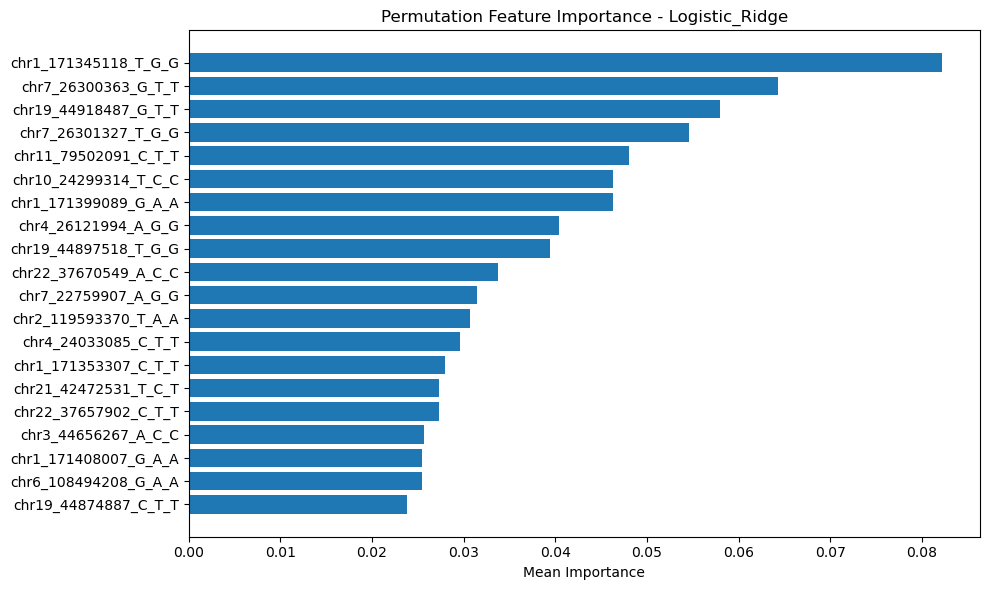


Evaluating Logistic_ElasticNet...
Mean ROC-AUC: 0.5402 ± 0.0149


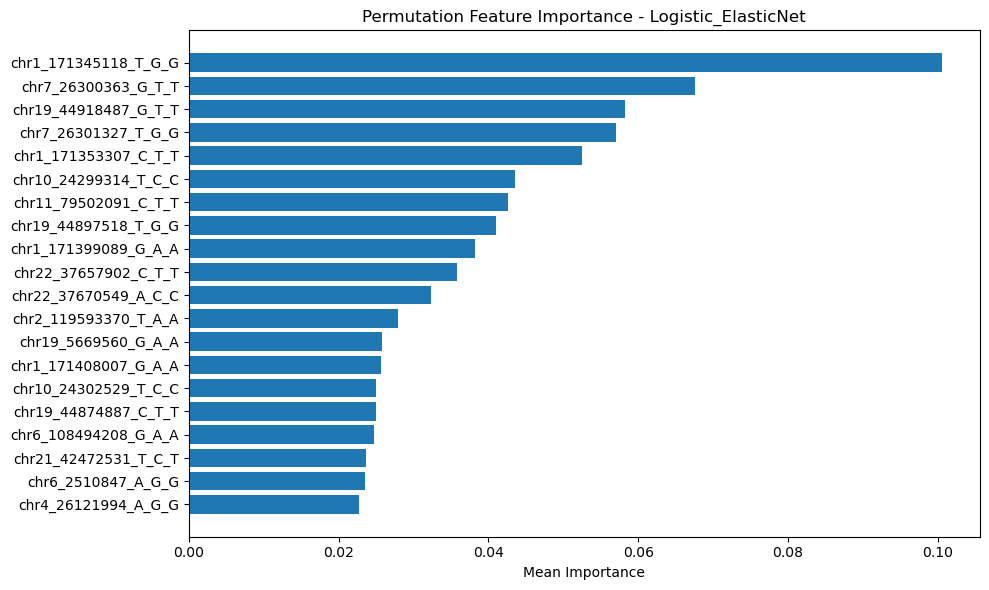


Evaluating XGBoost...
Mean ROC-AUC: 0.5508 ± 0.0245


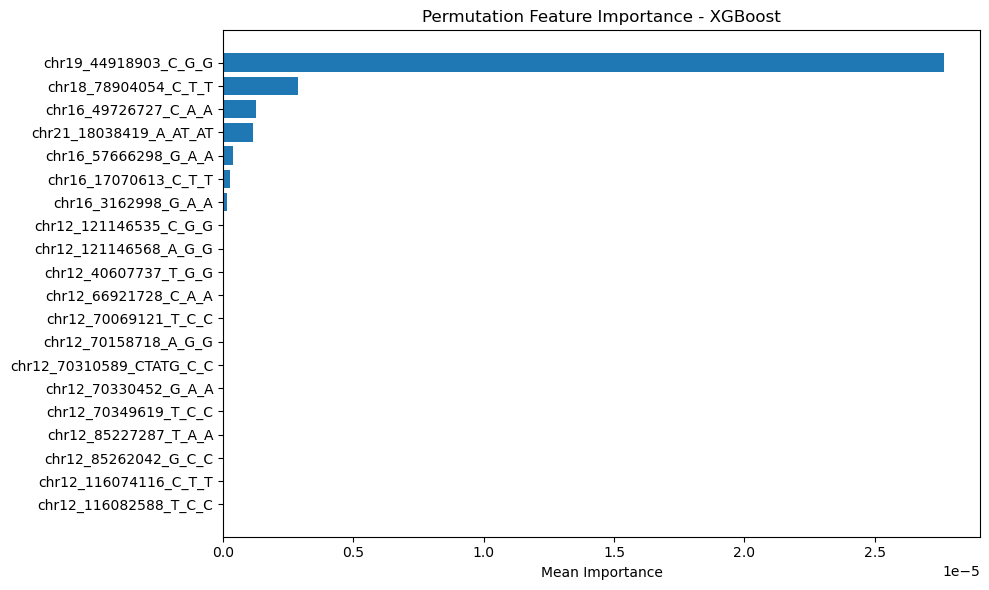


Evaluating LightGBM...
Mean ROC-AUC: 0.5335 ± 0.0284
[LightGBM] [Info] Number of positive: 860, number of negative: 1749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2773
[LightGBM] [Info] Number of data points in the train set: 2609, number of used features: 967
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329628 -> initscore=-0.709867
[LightGBM] [Info] Start training from score -0.709867


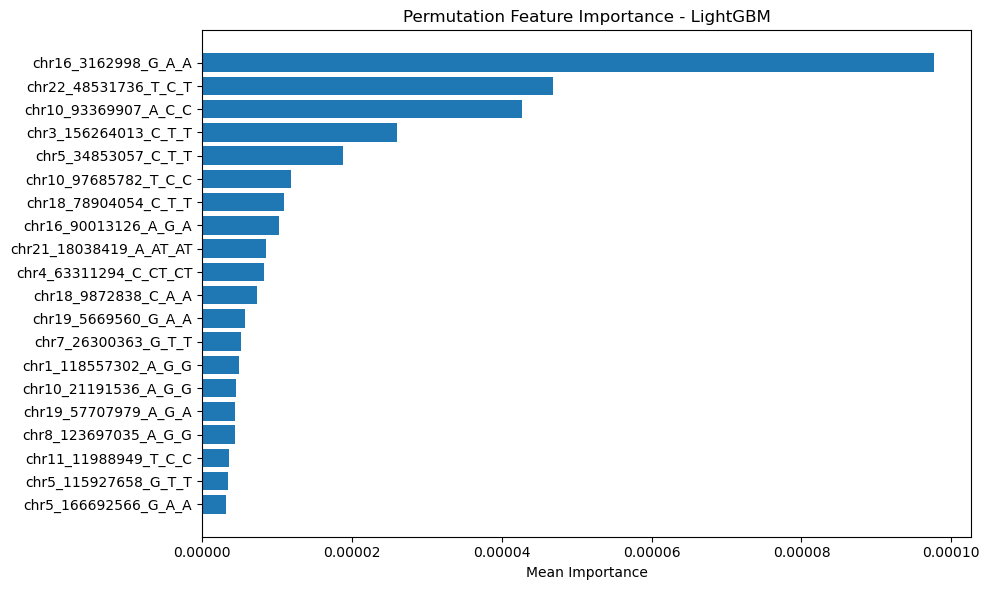


Evaluating CatBoost...
Mean ROC-AUC: 0.5581 ± 0.0339


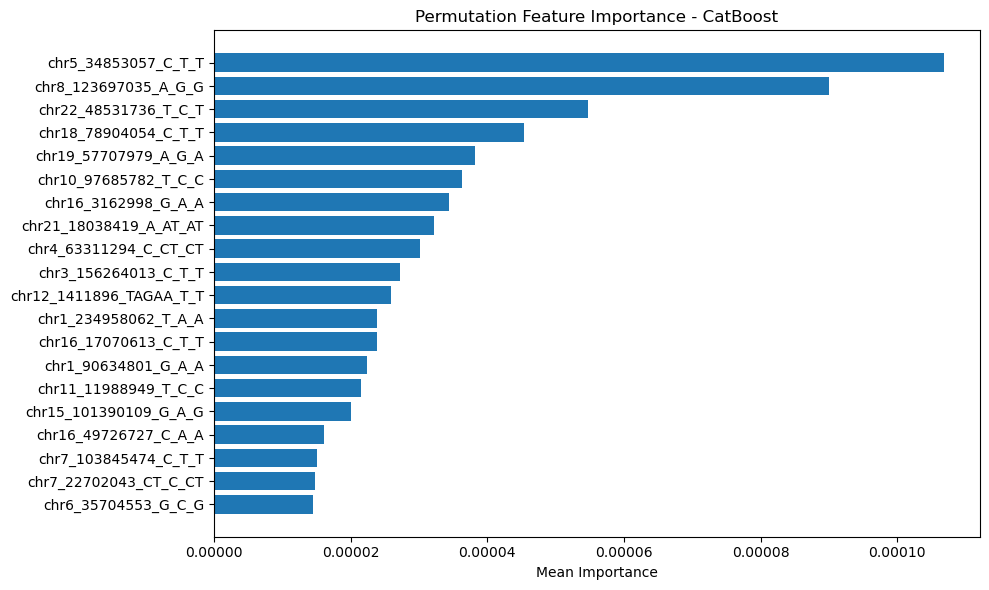


Evaluating NeuralNetwork...
Mean ROC-AUC: 0.5317 ± 0.0374


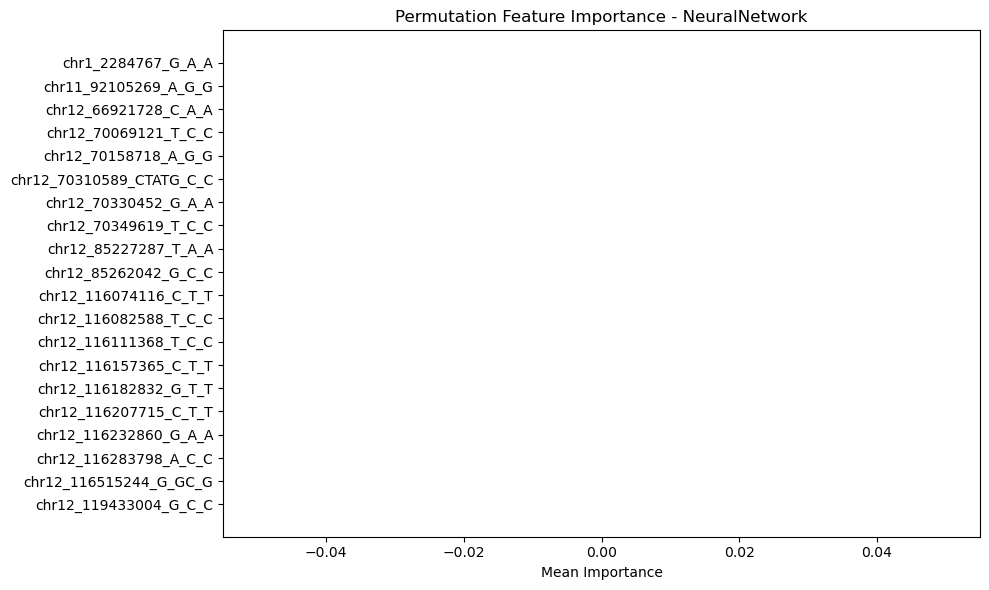

In [52]:
# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Evaluate models === #
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    # Cross-validated ROC-AUC
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    print(f"Mean ROC-AUC: {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")
    
    # Fit the model on the full dataset to get feature importance
    model.fit(X, y)
    
    # Permutation Feature Importance (PFI)
    result = permutation_importance(model, X, y, scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1)
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)
    
    # Save feature importance
    importance_df.to_csv(f"PFI_{name}.csv", index=False)
    
    # Plot top 20 features
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
    plt.xlabel('Mean Importance')
    plt.title(f'Permutation Feature Importance - {name}')
    plt.tight_layout()
    plt.savefig(f"PFI_{name}.png")
    plt.show()